<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/PyTorch_Learning_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import torch
from torch import nn

#torchvision for datasets and image transformation
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [4]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.86MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.10MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [14]:
image, label = train_data[0]
image.shape, type(label)

(torch.Size([1, 28, 28]), int)

In [17]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


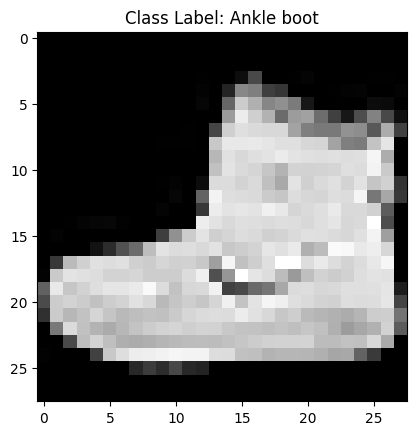

In [20]:
fig, ax = plt.subplots()
plt.imshow(image.squeeze(), cmap = "gray")
ax.set_title(f'Class Label: {class_names[label]}')
plt.show();

In [92]:
index_candidates = (train_data.targets == 2).nonzero(as_tuple=False).squeeze()

random_idx = torch.randint(low = 0, high = len(index_candidates), size = [1]).item()
location = index_candidates[random_idx].item()

Text(0.5, 1.0, 'Pullover')

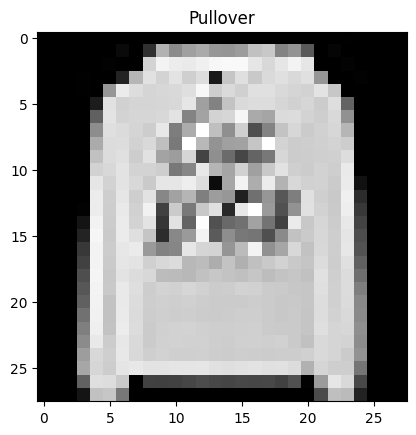

In [93]:
image, a = train_data[location]
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[2])

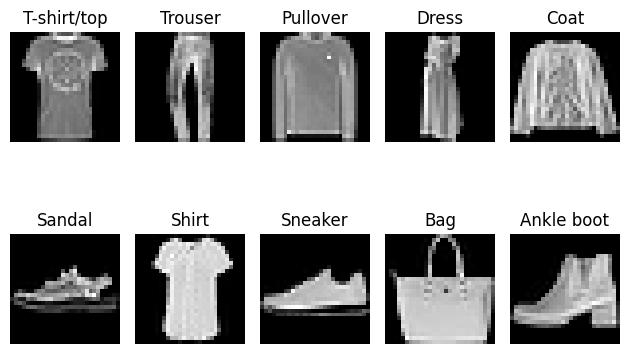

In [94]:
rows = 2
cols = 5
fig, axs = plt.subplots(2,5)

for i in range(rows * cols):
    index_candidates = (train_data.targets == i).nonzero(as_tuple=False).squeeze()
    random_idx = index_candidates[torch.randint(low = 0, high = len(index_candidates), size = [1]).item()].item()
    image, _ = train_data[random_idx]
    ax = axs[i // cols, i % cols]
    ax.imshow(image.squeeze(), cmap = "gray")
    ax.set_title(class_names[i])
    ax.axis("off")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()